Preprocessing complete!


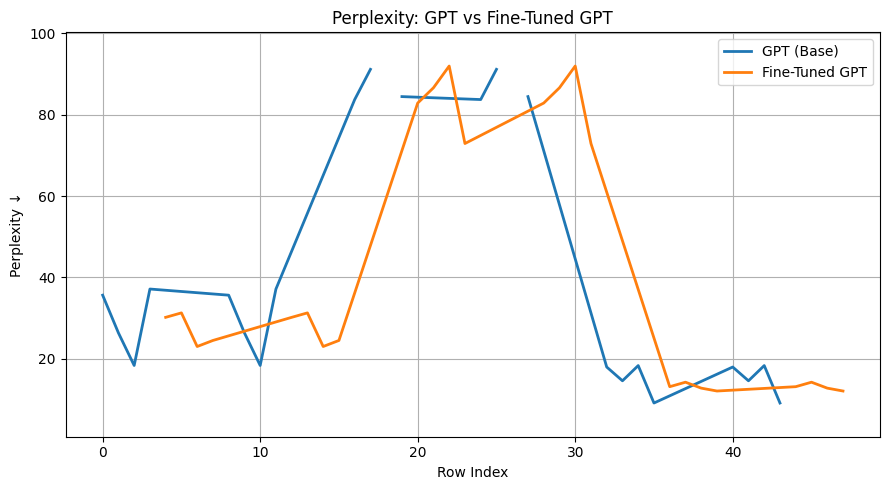

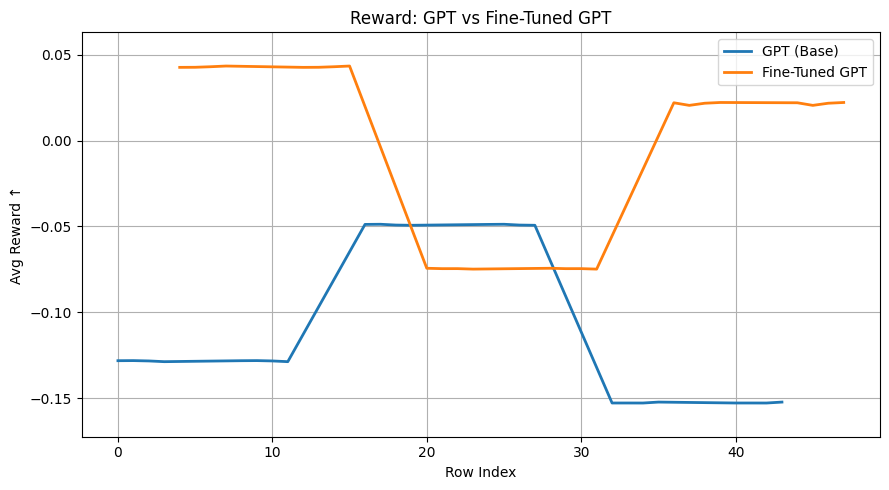

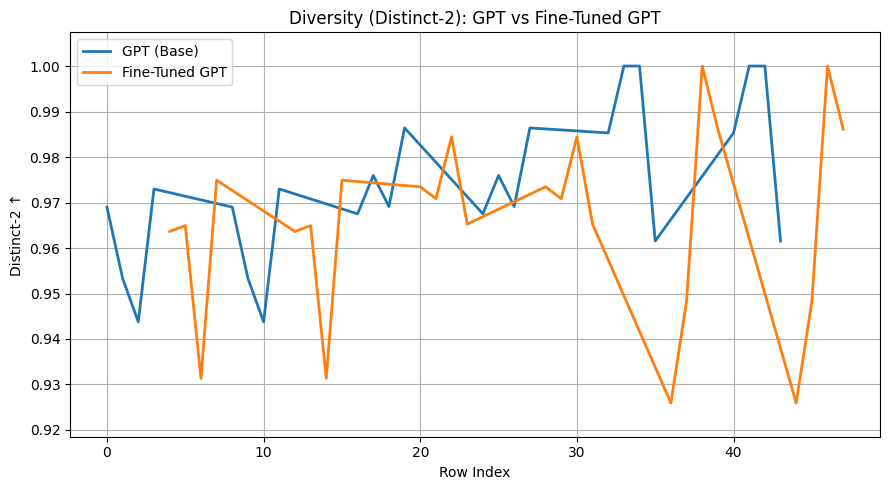

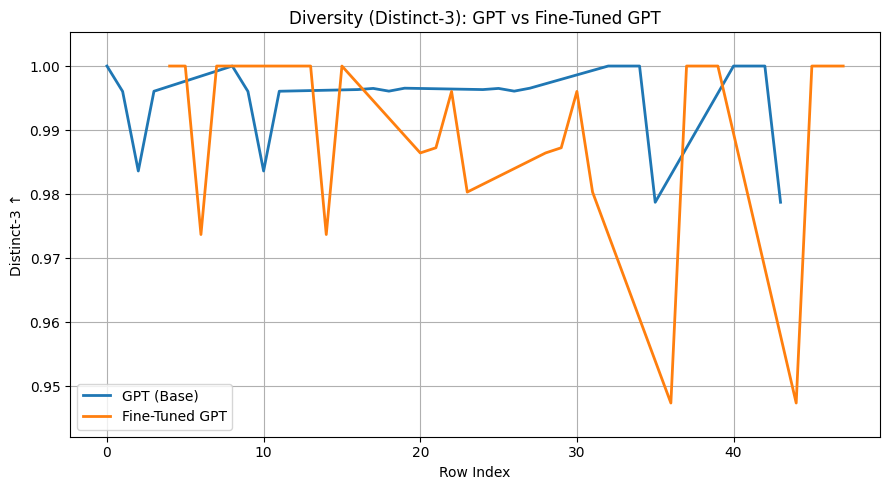

/tmp/ipykernel_115381/1646439870.py:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(["model_type", "config"])[["avg_reward", "perplexity", "distinct_2", "distinct_3"]].mean()


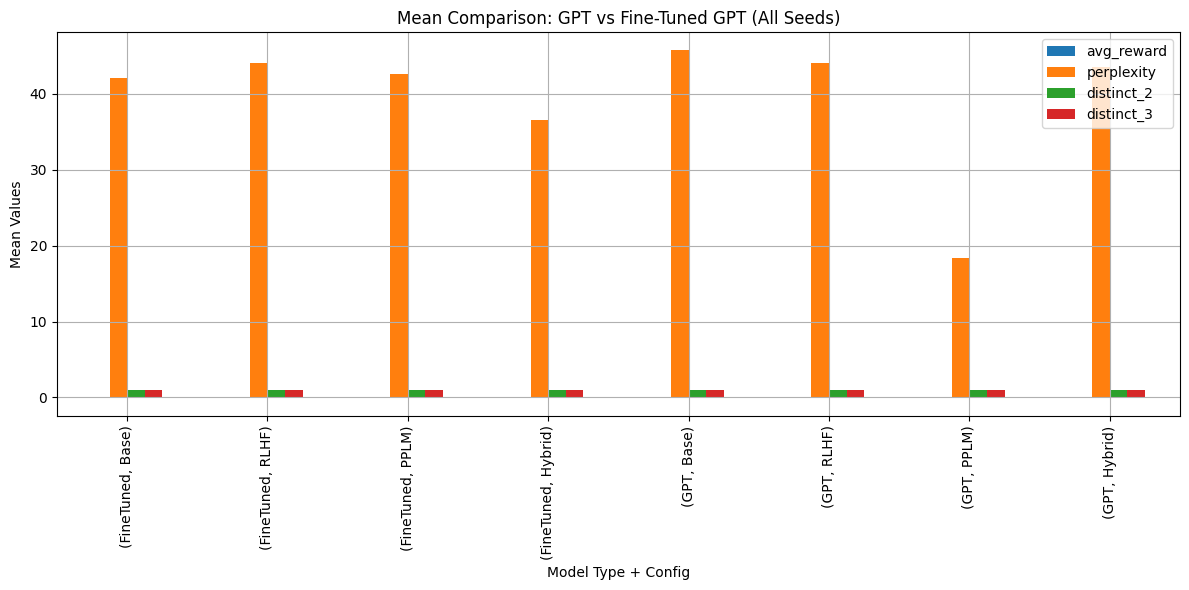

All plots generated successfully!


In [2]:
# ============================================================
# 1. Load libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["axes.grid"] = True

# ============================================================
# 2. Load the CSV
# ============================================================
df = pd.read_csv("/home/varun/Desktop/New Folder/Reciprocal-Contextual-Poetry-Generation/outputs-gpu/experiments/batch/raw_records.csv")
df.replace("", np.nan, inplace=True)

# ============================================================
# 3. Preprocessing based on YOUR RULE
# ============================================================
# Every 8 rows → 4 GPT + 4 FineTuned

def assign_model_type(df):
    model_types = []
    for i in range(len(df)):
        pos = i % 8      # position inside block
        if pos < 4:
            model_types.append("GPT")          # first 4 = Base GPT
        else:
            model_types.append("FineTuned")    # next 4 = fine-tuned GPT
    return model_types

df["model_type"] = assign_model_type(df)

# Ensure plotting order always consistent
config_order = ["Base", "RLHF", "PPLM", "Hybrid"]
df["config"] = pd.Categorical(df["config"], categories=config_order, ordered=True)

print("Preprocessing complete!")
df.head(12)

# ============================================================
# 4. Optional smoothing function
# ============================================================
def smooth(series, factor=0.7):
    smoothed = [series.iloc[0]]
    for value in series.iloc[1:]:
        smoothed.append(smoothed[-1]*factor + value*(1-factor))
    return smoothed

# Uncomment to use smoothing:
# df["avg_reward"] = smooth(df["avg_reward"])
# df["perplexity"] = smooth(df["perplexity"])

# ============================================================
# 5. Plotting utilities
# ============================================================
def plot_metric(metric_name, ylabel=None, title=None):
    plt.figure(figsize=(9,5))

    # Plot GPT
    temp = df[df["model_type"] == "GPT"]
    plt.plot(
        temp.index,
        temp[metric_name],
        label="GPT (Base)",
        linewidth=2
    )

    # Plot Fine-Tuned
    temp = df[df["model_type"] == "FineTuned"]
    plt.plot(
        temp.index,
        temp[metric_name],
        label="Fine-Tuned GPT",
        linewidth=2
    )

    plt.xlabel("Row Index")
    plt.ylabel(ylabel if ylabel else metric_name)
    plt.title(title if title else metric_name)
    plt.margins(y=0.1)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# 6. Generate all required plots
# ============================================================

# Perplexity
plot_metric(
    "perplexity",
    ylabel="Perplexity ↓",
    title="Perplexity: GPT vs Fine-Tuned GPT"
)

# Average Reward
plot_metric(
    "avg_reward",
    ylabel="Avg Reward ↑",
    title="Reward: GPT vs Fine-Tuned GPT"
)

# Distinct-2
plot_metric(
    "distinct_2",
    ylabel="Distinct-2 ↑",
    title="Diversity (Distinct-2): GPT vs Fine-Tuned GPT"
)

# Distinct-3
plot_metric(
    "distinct_3",
    ylabel="Distinct-3 ↑",
    title="Diversity (Distinct-3): GPT vs Fine-Tuned GPT"
)

# ============================================================
# 7. Bar summary for each config: GPT vs FineTuned
# ============================================================
summary = df.groupby(["model_type", "config"])[["avg_reward", "perplexity", "distinct_2", "distinct_3"]].mean()

summary.plot(kind="bar", figsize=(12,6))
plt.title("Mean Comparison: GPT vs Fine-Tuned GPT (All Seeds)")
plt.xlabel("Model Type + Config")
plt.ylabel("Mean Values")
plt.tight_layout()
plt.show()

print("All plots generated successfully!")
